In [7]:
!pip install -r /content/requirements.txt

In [8]:
!pip install keras_preprocessing


In [9]:
import shutil
import os


# Define the path to the zipped folder in your Google Drive
# **UPDATE THIS PATH** to the actual location of your zip file in Google Drive
# For example: '/content/drive/My Drive/your_folder/archive.zip'
zipped_folder_path = '/content/archive.zip' # Placeholder path, update this

# Define the destination directory in your Colab environment where you want to unzip the folder
destination_directory = '/content/archive'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
  os.makedirs(destination_directory)

# Unzip the folder
# Add a check to see if the file exists before trying to unpack
if os.path.exists(zipped_folder_path):
    try:
        shutil.unpack_archive(zipped_folder_path, destination_directory)
        print(f"Folder unzipped to: {destination_directory}")
    except shutil.ReadError:
        print(f"Error: The file at {zipped_folder_path} is not a valid zip file.")
    except Exception as e:
        print(f"An unexpected error occurred during unzipping: {e}")
else:
    print(f"Error: The file {zipped_folder_path} was not found.")
    print("Please check if the path to the zip file in Google Drive is correct.")

# %%

Folder unzipped to: /content/archive


In [10]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [11]:
# prompt:  rename a folder name validation to test in a simple way

# Rename the folder
old_folder_path = '/content/archive/images/validation' # Update if the unzipped folder structure is different
new_folder_path = '/content/archive/images/test' # Update if the unzipped folder structure is different

if os.path.exists(old_folder_path):
  os.rename(old_folder_path, new_folder_path)
  print(f"Folder '{old_folder_path}' renamed to '{new_folder_path}'")
else:
  print(f"Folder '{old_folder_path}' not found. Cannot rename.")


Folder '/content/archive/images/validation' renamed to '/content/archive/images/test'


In [13]:
TRAIN_DIR = '/content/archive/images/train'
TEST_DIR = '/content/archive/images/test'

In [14]:
!ls /content/archive/images

images	test  train


In [15]:
if not os.path.exists(TEST_DIR):
    print(f"Error: The directory {TEST_DIR} was not found.")
    print("Please check if the unzipping process created this directory.")


In [16]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [17]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
neutral completed
fear completed
disgust completed
surprise completed
sad completed
angry completed


In [18]:
print(train)

                                               image  label
0      /content/archive/images/train/happy/16436.jpg  happy
1      /content/archive/images/train/happy/20596.jpg  happy
2       /content/archive/images/train/happy/5252.jpg  happy
3      /content/archive/images/train/happy/26559.jpg  happy
4      /content/archive/images/train/happy/14112.jpg  happy
...                                              ...    ...
28816  /content/archive/images/train/angry/11174.jpg  angry
28817  /content/archive/images/train/angry/27900.jpg  angry
28818  /content/archive/images/train/angry/35113.jpg  angry
28819  /content/archive/images/train/angry/11274.jpg  angry
28820  /content/archive/images/train/angry/19289.jpg  angry

[28821 rows x 2 columns]


In [19]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

happy completed
neutral completed
fear completed
disgust completed
surprise completed
sad completed
angry completed


In [20]:
print(test)
print(test['image'])

                                             image  label
0     /content/archive/images/test/happy/24390.jpg  happy
1      /content/archive/images/test/happy/6784.jpg  happy
2      /content/archive/images/test/happy/7975.jpg  happy
3      /content/archive/images/test/happy/2790.jpg  happy
4      /content/archive/images/test/happy/9392.jpg  happy
...                                            ...    ...
7061   /content/archive/images/test/angry/8103.jpg  angry
7062  /content/archive/images/test/angry/19093.jpg  angry
7063   /content/archive/images/test/angry/9293.jpg  angry
7064  /content/archive/images/test/angry/17316.jpg  angry
7065   /content/archive/images/test/angry/2050.jpg  angry

[7066 rows x 2 columns]
0       /content/archive/images/test/happy/24390.jpg
1        /content/archive/images/test/happy/6784.jpg
2        /content/archive/images/test/happy/7975.jpg
3        /content/archive/images/test/happy/2790.jpg
4        /content/archive/images/test/happy/9392.jpg
              

In [21]:
from tqdm.notebook import tqdm

In [22]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [23]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [24]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [25]:
x_train = train_features/255.0
x_test = test_features/255.0

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [28]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [29]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [30]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
from tensorflow.keras.optimizers import Nadam

# Nadam also has hyperparameters you might tune, like learning rate
nadam_optimizer = Nadam(learning_rate=0.002)

model.compile(optimizer = nadam_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [35]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test,y_test))

Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.2542 - loss: 1.7978 - val_accuracy: 0.2598 - val_loss: 1.7509
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.2857 - loss: 1.7309 - val_accuracy: 0.3200 - val_loss: 1.6455
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.3172 - loss: 1.6703 - val_accuracy: 0.3685 - val_loss: 1.5897
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.3671 - loss: 1.5991 - val_accuracy: 0.4091 - val_loss: 1.4837
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.3881 - loss: 1.5545 - val_accuracy: 0.4533 - val_loss: 1.4065
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.4149 - loss: 1.5087 - val_accuracy: 0.4793 - val_loss: 1.3604
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.4327 - loss: 1.4733 - val_accuracy: 0.4849 - val_loss: 1.3300
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.4361 - loss: 1.4522 - 

In [36]:
from keras.models import model_from_json

In [37]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [38]:
# Modify the code in the emotion.py file to load from the correct filenames.
# Change 'facialemotionmodel.json' to 'emotiondetector.json'
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# Change 'facialemotionmodel.h5' to 'emotiondetector.h5'
model.load_weights("emotiondetector.h5")

In [39]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [40]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [42]:
image = os.path.join(TRAIN_DIR, 'sad/42.jpg')
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  sad


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is  sad


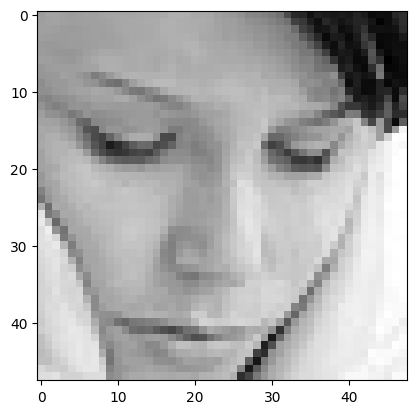

In [44]:
image = os.path.join(TRAIN_DIR, 'sad/42.jpg')
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  sad


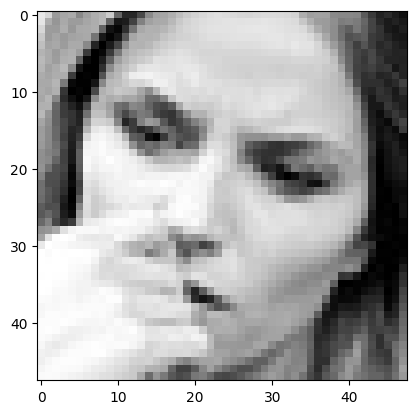

In [45]:
image = os.path.join(TRAIN_DIR, 'fear/2.jpg')
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  angry


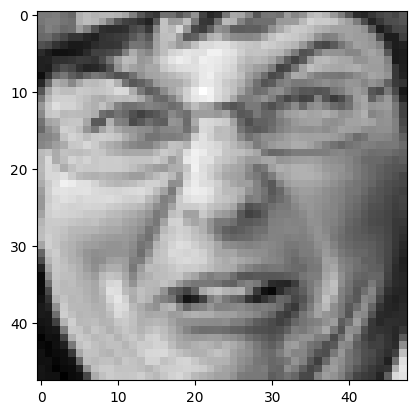

In [46]:
image = os.path.join(TRAIN_DIR, 'disgust/299.jpg')
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  happy


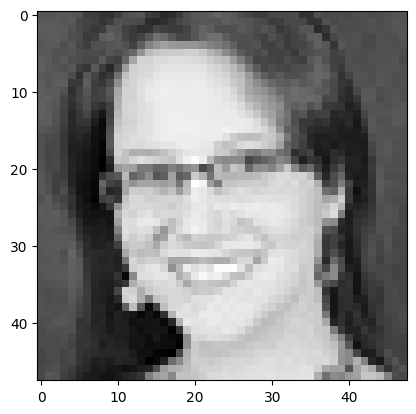

In [47]:
image = os.path.join(TRAIN_DIR, 'happy/7.jpg')
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
model prediction is  surprise


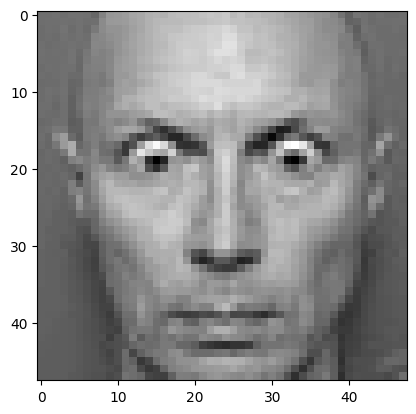

In [48]:
image = os.path.join(TRAIN_DIR, 'surprise/15.jpg')
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

<IPython.core.display.Javascript object>

Detected Emotion: happy


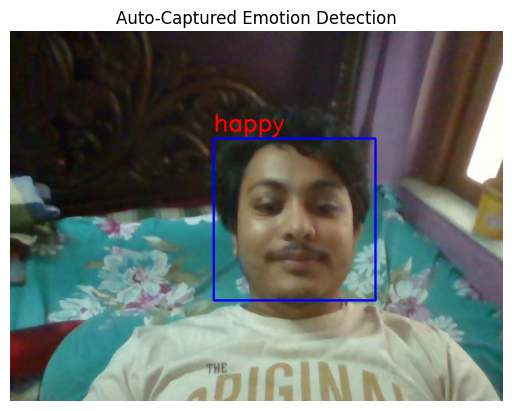

<Figure size 640x480 with 0 Axes>

In [85]:
# prompt: import a file of python code to run in colab

# To run a local Python file in Colab, you can use the !run command.
# First, make sure the file is uploaded to your Colab session.
# prompt: import a file of python code to run in colab

# To run a local Python file in Colab, you can use the !run command.
# First, make sure the file is uploaded to your Colab session.
# You can upload it manually or mount your Google Drive as shown in the preceding code.
# If the file is named 'your_script.py' and is in the current directory:
%run /content/emotion3.py
